# Exploratory Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
%pylab inline
pd.set_option('display.max_columns', None) # Display all columns int dataframe
pd.set_option('display.max_rows', None) # Display all rows int dataframe

Populating the interactive namespace from numpy and matplotlib


In [5]:
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')
print(train.shape) # Show Row-Count and Column-Count
print(test.shape) # Show Row-Count and Column-Count

(1521787, 23)
(421665, 22)


In [6]:
#feature_train, target = train, train.pop('SalePrice')
feature_train = train.copy()
#feature_train.pop('fraud_ind')
feature = pd.concat([feature_train,test], ignore_index=True)
feature.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0.0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0.0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0.0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0.0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0.0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [7]:
feature.describe(include = 'all') # shows all feature: number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
count,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1943452,1.943452e+06,1927156,1927156,1.521787e+06,1.943452e+06,1943452,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06,1943452,1.943452e+06,1.943452e+06,1.943452e+06,1.943452e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,N,N,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1444757,NaN,1920761,1842623,NaN,NaN,1890807,NaN,NaN,NaN,NaN,NaN,1918335,NaN,NaN,NaN,NaN
mean,6.004543e+03,8.208741e+04,1.090453e+05,6.516174e+02,4.825625e+00,5.378875e+01,NaN,4.142680e+00,NaN,NaN,1.337572e-02,4.748365e+00,NaN,4.841128e-02,5.839281e+01,1.460061e+05,2.979138e+02,5.589230e+04,NaN,4.754399e+03,9.562308e+01,2.475286e-02,9.791667e+05
std,1.505735e+03,4.732348e+04,6.110356e+04,4.032183e+02,6.557577e-01,2.076681e+01,NaN,2.402570e+00,NaN,NaN,1.148774e-01,1.114383e+00,NaN,3.615652e-01,3.409522e+01,5.227967e+04,7.841150e+01,3.082944e+04,NaN,1.982351e+03,1.896446e+01,2.211643e-01,5.654969e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.982000e+03,4.129400e+04,5.751900e+04,4.300400e+02,5.000000e+00,6.200000e+01,NaN,2.000000e+00,NaN,NaN,0.000000e+00,5.000000e+00,NaN,0.000000e+00,2.900000e+01,1.104500e+05,2.500000e+02,3.362500e+04,NaN,3.952000e+03,1.020000e+02,0.000000e+00,4.896218e+05
50%,6.678000e+03,8.196600e+04,1.099410e+05,5.887500e+02,5.000000e+00,6.200000e+01,NaN,4.000000e+00,NaN,NaN,0.000000e+00,5.000000e+00,NaN,0.000000e+00,5.800000e+01,1.513290e+05,2.640000e+02,5.933300e+04,NaN,5.817000e+03,1.020000e+02,0.000000e+00,9.794235e+05
75%,6.769000e+03,1.229640e+05,1.621700e+05,8.025400e+02,5.000000e+00,6.200000e+01,NaN,5.000000e+00,NaN,NaN,0.000000e+00,5.000000e+00,NaN,0.000000e+00,8.700000e+01,1.857550e+05,3.430000e+02,7.920000e+04,NaN,5.817000e+03,1.020000e+02,0.000000e+00,1.468711e+06


In [8]:
feature.info() # Show dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1943452 entries, 0 to 1943451
Data columns (total 23 columns):
acqic        int64
bacno        int64
cano         int64
conam        float64
contp        int64
csmcu        int64
ecfg         object
etymd        int64
flbmk        object
flg_3dsmk    object
fraud_ind    float64
hcefg        int64
insfg        object
iterm        int64
locdt        int64
loctm        float64
mcc          int64
mchno        int64
ovrlt        object
scity        int64
stocn        int64
stscd        int64
txkey        int64
dtypes: float64(3), int64(15), object(5)
memory usage: 341.0+ MB


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

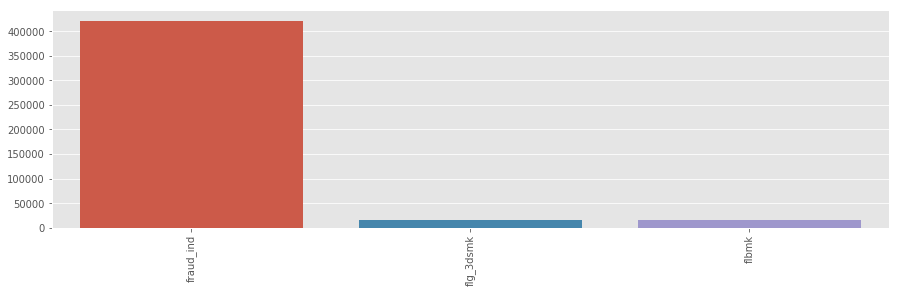

In [9]:
#check feature null data
col_null_info = feature.isnull().sum(); 
col_null_info = col_null_info[col_null_info>0].sort_values(ascending=False)
plt.figure(figsize=(15,4),facecolor='white')
sns.barplot(x=col_null_info.index, y=col_null_info.values)
plt.xticks(rotation=90)

# Data Cleaning

### Missing Data

In [10]:
feature.isnull().mean() * 100 # Show all columns null value percentage

acqic         0.000000
bacno         0.000000
cano          0.000000
conam         0.000000
contp         0.000000
csmcu         0.000000
ecfg          0.000000
etymd         0.000000
flbmk         0.838508
flg_3dsmk     0.838508
fraud_ind    21.696703
hcefg         0.000000
insfg         0.000000
iterm         0.000000
locdt         0.000000
loctm         0.000000
mcc           0.000000
mchno         0.000000
ovrlt         0.000000
scity         0.000000
stocn         0.000000
stscd         0.000000
txkey         0.000000
dtype: float64

In [11]:
# Group by flbmk values
feature.flbmk.value_counts()

N    1920761
Y       6395
Name: flbmk, dtype: int64

In [12]:
# Group by flg_3dsmk values
feature.flg_3dsmk.value_counts()

N    1842623
Y      84533
Name: flg_3dsmk, dtype: int64

In [13]:
cols1 = ["flbmk" , "flg_3dsmk"]
for col in cols1:
    feature[col].fillna("N", inplace=True)

In [14]:
feature.head(5)

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0.0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0.0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0.0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0.0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0.0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


In [15]:
feature = pd.get_dummies(feature, prefix=['ecfg','flbmk','flg_3dsmk','insfg','ovrlt'], columns=['ecfg','flbmk','flg_3dsmk','insfg','ovrlt'])

In [16]:
feature.head(5)

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,txkey,ecfg_N,ecfg_Y,flbmk_N,flbmk_Y,flg_3dsmk_N,flg_3dsmk_Y,insfg_N,insfg_Y,ovrlt_N,ovrlt_Y
0,6881,113261,38038,513.80,5,0,0,0.0,5,0,33,172652.0,457,59333,0,102,0,516056,1,0,1,0,1,0,1,0,1,0
1,0,134508,45725,465.62,5,0,2,0.0,0,0,9,105114.0,451,0,5817,102,0,4376,1,0,1,0,1,0,1,0,1,0
2,6881,15408,188328,513.80,5,0,0,0.0,5,0,6,152458.0,457,59333,0,102,0,483434,1,0,1,0,1,0,1,0,1,0
3,6716,157159,29967,1016.11,5,62,5,0.0,5,0,5,172946.0,247,50436,3281,102,0,1407164,1,0,1,0,1,0,1,0,1,0
4,5975,105985,81305,713.66,5,62,4,0.0,5,0,6,182129.0,263,93775,5817,102,0,1051004,1,0,1,0,1,0,1,0,1,0


In [17]:
feature = feature.drop(['txkey'], axis=1)

In [18]:
train_full = feature[feature['fraud_ind'].notnull()]
test_full = feature[feature['fraud_ind'].isnull()]

In [19]:
print(train_full.shape) # Show Row-Count and Column-Count
print(test_full.shape) # Show Row-Count and Column-Count

(1521787, 27)
(421665, 27)


In [20]:
train_full.head(5)

,acqic,bacno,cano,conam,contp,csmcu,etymd,fraud_ind,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,ecfg_N,ecfg_Y,flbmk_N,flbmk_Y,flg_3dsmk_N,flg_3dsmk_Y,insfg_N,insfg_Y,ovrlt_N,ovrlt_Y
0,6881,113261,38038,513.80,5,0,0,0.0,5,0,33,172652.0,457,59333,0,102,0,1,0,1,0,1,0,1,0,1,0
1,0,134508,45725,465.62,5,0,2,0.0,0,0,9,105114.0,451,0,5817,102,0,1,0,1,0,1,0,1,0,1,0
2,6881,15408,188328,513.80,5,0,0,0.0,5,0,6,152458.0,457,59333,0,102,0,1,0,1,0,1,0,1,0,1,0
3,6716,157159,29967,1016.11,5,62,5,0.0,5,0,5,172946.0,247,50436,3281,102,0,1,0,1,0,1,0,1,0,1,0
4,5975,105985,81305,713.66,5,62,4,0.0,5,0,6,182129.0,263,93775,5817,102,0,1,0,1,0,1,0,1,0,1,0


In [21]:
# Group by flg_3dsmk values
train_full.fraud_ind.value_counts()

0.0    1501432
1.0      20355
Name: fraud_ind, dtype: int64

In [22]:
y = train_full.pop('fraud_ind')

In [23]:
y.value_counts()

0.0    1501432
1.0      20355
Name: fraud_ind, dtype: int64

In [24]:
X = train_full

In [25]:
train, valid, trainY, validY = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

In [26]:
print(X.shape)
print(y.shape)
print(train.shape)
print(trainY.shape)
print(valid.shape)
print(validY.shape)

(1521787, 26)
(1521787,)
(1217429, 26)
(1217429,)
(304358, 26)
(304358,)


In [27]:
train.head(5)

,acqic,bacno,cano,conam,contp,csmcu,etymd,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,ecfg_N,ecfg_Y,flbmk_N,flbmk_Y,flg_3dsmk_N,flg_3dsmk_Y,insfg_N,insfg_Y,ovrlt_N,ovrlt_Y
915719,6769,82976,127034,488.26,5,62,5,5,0,63,191826.0,251,77991,5817,102,0,1,0,1,0,1,0,1,0,1,0
303418,6231,92797,80048,1004.72,5,62,4,5,0,51,85825.0,191,16615,5817,102,0,1,0,1,0,1,0,1,0,1,0
609193,0,99341,55072,465.62,5,0,2,0,0,53,100943.0,451,0,5817,102,0,1,0,1,0,1,0,1,0,1,0
1319797,6032,13745,198031,711.70,5,62,2,5,0,32,205803.0,247,78537,5817,102,0,0,1,1,0,1,0,1,0,1,0
1337767,5720,81642,149070,0.00,5,59,8,5,0,21,42824.0,192,67459,6221,75,0,0,1,1,0,1,0,1,0,1,0


In [28]:
trainY.head(5)

915719     0.0
303418     0.0
609193     0.0
1319797    0.0
1337767    0.0
Name: fraud_ind, dtype: float64

In [29]:
valid.head(5)

,acqic,bacno,cano,conam,contp,csmcu,etymd,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,ecfg_N,ecfg_Y,flbmk_N,flbmk_Y,flg_3dsmk_N,flg_3dsmk_Y,insfg_N,insfg_Y,ovrlt_N,ovrlt_Y
55692,5975,138896,34065,775.12,5,62,4,5,0,57,151440.0,263,89735,5817,102,0,1,0,1,0,1,0,1,0,1,0
206365,6716,25899,197832,776.36,5,62,5,5,0,57,115201.0,257,40120,3590,102,0,1,0,1,0,1,0,1,0,1,0
1197475,6189,7817,130254,655.51,5,62,4,5,0,38,132647.0,292,91366,5817,102,0,1,0,1,0,1,0,1,0,1,0
253230,6292,97100,2122,561.61,5,62,2,5,0,32,140314.0,209,38207,5817,102,0,0,1,1,0,1,0,1,0,1,0
1068720,6779,142888,200913,759.87,5,62,4,5,0,30,195857.0,294,8795,5812,102,0,1,0,1,0,1,0,1,0,1,0


In [30]:
validY.head(5)

55692      0.0
206365     0.0
1197475    0.0
253230     0.0
1068720    0.0
Name: fraud_ind, dtype: float64

In [31]:
testY = pd.read_csv("./submission_test.csv")
testY.drop(['txkey'], axis=1, inplace=True)

In [32]:
test = test_full
test.drop(['fraud_ind'], axis=1, inplace=True)

In [33]:
test.head(5)

,acqic,bacno,cano,conam,contp,csmcu,etymd,hcefg,iterm,locdt,loctm,mcc,mchno,scity,stocn,stscd,ecfg_N,ecfg_Y,flbmk_N,flbmk_Y,flg_3dsmk_N,flg_3dsmk_Y,insfg_N,insfg_Y,ovrlt_N,ovrlt_Y
1521787,6881,163188,116799,513.8,5,0,0,5,0,102,215328.0,457,59360,0,102,0,1,0,1,0,1,0,1,0,1,0
1521788,6881,163188,116799,513.8,5,0,0,5,0,102,222007.0,457,59360,0,102,0,1,0,1,0,1,0,1,0,1,0
1521789,6881,163188,116799,513.8,5,0,0,5,0,100,170013.0,457,59360,0,102,0,1,0,1,0,1,0,1,0,1,0
1521790,6881,163188,116799,513.8,5,0,0,5,0,100,165914.0,457,59360,0,102,0,1,0,1,0,1,0,1,0,1,0
1521791,6881,163188,116799,513.8,5,0,0,5,0,102,215311.0,457,59360,0,102,0,1,0,1,0,1,0,1,0,1,0


In [34]:
testY.head(5)

,fraud_ind
0,0
1,0
2,0
3,0
4,0


In [35]:
import xgboost as xgb

dtrain = xgb.DMatrix(train, label=trainY)
dvalid = xgb.DMatrix(valid, label=validY)
#dtest = xgb.DMatrix(test, label=testY)

## fixed parameters
scale_pos_weight = sum(trainY==0)/sum(trainY==1)  
num_rounds=10 # number of boosting iterations

param = {'silent':1,
         'min_child_weight':1, ## unbalanced dataset
         'objective':'binary:logistic',
         'eval_metric':'auc', 
         'scale_pos_weight':scale_pos_weight}

def do_train(param, train,train_s,trainY,valid,valid_s,validY):
    ## train with given fixed and variable parameters
    ## and report performance on validation dataset
    evallist  = [(train,train_s), (valid,valid_s)]
    model = xgb.train( param, train, num_boost_round=num_rounds, 
                      evals=evallist )    
    preds = model.predict(valid)
    labels = valid.get_label()
      
    act_pos=sum(validY==1)
    act_neg=valid.num_row()-act_pos
    true_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5) & (labels[i]==1))
    false_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5) & (labels[i]==0))
    false_neg=act_pos-true_pos
    true_neg=act_neg-false_pos
    
    ## precision: tp/(tp+fp) percentage of correctly classified predicted positives
    ## recall: tp/(tp+fn) percentage of positives correctly classified
    ## F-score with beta=1
    ## see Sokolova et al., 2006 "Beyond Accuracy, F-score and ROC:
    ## a Family of Discriminant Measures for Performance Evaluation"
    ## fscore <- 2*precision.neg*recall.neg/(precision.neg+recall.neg)
    
    precision = true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    f_score = 2*precision*recall/(precision+recall)  
    
    print('\nconfusion matrix')
    print('----------------')
    print( 'tn:{:6d} fp:{:6d}'.format(true_neg,false_pos))
    print( 'fn:{:6d} tp:{:6d}'.format(false_neg,true_pos))
    return(f_score)    

In [36]:
from collections import OrderedDict
from xgboost import XGBClassifier

best_model =  XGBClassifier()
## parameters to be tuned
tune_dic = OrderedDict()

tune_dic['max_depth']= np.array([20,25,30]) ## maximum tree depth
tune_dic['colsample_bytree']= np.linspace(0.5,1.0,6) ## subsample ratio of columns
tune_dic['eta']= np.linspace(0.3,0.6,4) ## learning rate

best_params = dict()
best_f_score = -1

import itertools
var_params = [ i for i in itertools.product(*tune_dic.values())]
search=np.random.choice(np.arange(len(var_params)),10,replace=False)

columns=[*tune_dic.keys()]+['F Score']

results = pd.DataFrame(index=range(len(search)), columns=columns) ## to check results

for i in range(len(search)): ## len(search)
    
    for (key,val) in zip(tune_dic.keys(),var_params[search[i]]):
        param[key]=val

    print()    
    #f_score = do_train(param, dtrain,'train',trainY,dvalid,'valid',validY)
    #do_train(param, train,train_s,trainY,valid,valid_s,validY):
    
    evallist  = [(dtrain,'train'), (dvalid,'valid')]
    
    model = xgb.train( param, dtrain, num_boost_round=num_rounds, 
                      evals=evallist )    
    preds = model.predict(dvalid)
    labels = dvalid.get_label()
      
    act_pos=sum(validY==1)
    act_neg=dvalid.num_row()-act_pos
    true_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5) & (labels[i]==1))
    false_pos=sum(1 for i in range(len(preds)) if (preds[i]>=0.5) & (labels[i]==0))
    false_neg=act_pos-true_pos
    true_neg=act_neg-false_pos
    
    ## precision: tp/(tp+fp) percentage of correctly classified predicted positives
    ## recall: tp/(tp+fn) percentage of positives correctly classified
    ## F-score with beta=1
    ## see Sokolova et al., 2006 "Beyond Accuracy, F-score and ROC:
    ## a Family of Discriminant Measures for Performance Evaluation"
    ## fscore <- 2*precision.neg*recall.neg/(precision.neg+recall.neg)
    
    precision = true_pos/(true_pos+false_pos)
    recall = true_pos/(true_pos+false_neg)
    f_score = 2*precision*recall/(precision+recall)  
    
    print('\nconfusion matrix')
    print('----------------')
    print( 'tn:{:6d} fp:{:6d}'.format(true_neg,false_pos))
    print( 'fn:{:6d} tp:{:6d}'.format(false_neg,true_pos))

    
    
    results.loc[i,[*tune_dic.keys()]]=var_params[search[i]]
    results.loc[i,'F Score']=f_score
    
    if f_score > best_f_score:
        best_model = model
        best_f_score = f_score
        print('\n*** better f-score',f_score)
        for (key,val) in zip(tune_dic.keys(),var_params[search[i]]):
            best_params[key]=val        
            print(key,': ',val,' ',end='')
        print()    


[0]	train-auc:0.992253	valid-auc:0.969017
[1]	train-auc:0.996667	valid-auc:0.965657
[2]	train-auc:0.997902	valid-auc:0.970847
[3]	train-auc:0.998841	valid-auc:0.973225
[4]	train-auc:0.999187	valid-auc:0.97554
[5]	train-auc:0.999463	valid-auc:0.977178
[6]	train-auc:0.999673	valid-auc:0.977521
[7]	train-auc:0.999793	valid-auc:0.980679
[8]	train-auc:0.999858	valid-auc:0.983747
[9]	train-auc:0.999914	valid-auc:0.98544

confusion matrix
----------------
tn:297967 fp:  2320
fn:   787 tp:  3284

*** better f-score 0.6788630490956072
max_depth :  20  colsample_bytree :  0.8  eta :  0.5  

[0]	train-auc:0.995416	valid-auc:0.973179
[1]	train-auc:0.998386	valid-auc:0.962957
[2]	train-auc:0.99889	valid-auc:0.967094
[3]	train-auc:0.999257	valid-auc:0.977087
[4]	train-auc:0.999378	valid-auc:0.979445
[5]	train-auc:0.99957	valid-auc:0.980416
[6]	train-auc:0.999635	valid-auc:0.981708
[7]	train-auc:0.999708	valid-auc:0.983172
[8]	train-auc:0.999785	valid-auc:0.983994
[9]	train-auc:0.999865	valid-auc:0.

In [39]:
dtest = xgb.DMatrix(test, label=testY)

In [52]:
preds = best_model.predict(dtest)

In [53]:
type(preds)

numpy.ndarray

In [54]:
len(preds)

421665

In [55]:
for i in range(421665):
    if preds[i] > 0.5:
        preds[i] = 1
    else:
        preds[i] = 0

In [56]:
submission = pd.read_csv("./submission_test.csv")
submission.iloc[:,1] = (preds)
submission.to_csv("submission_20190927_4.csv", index=False)